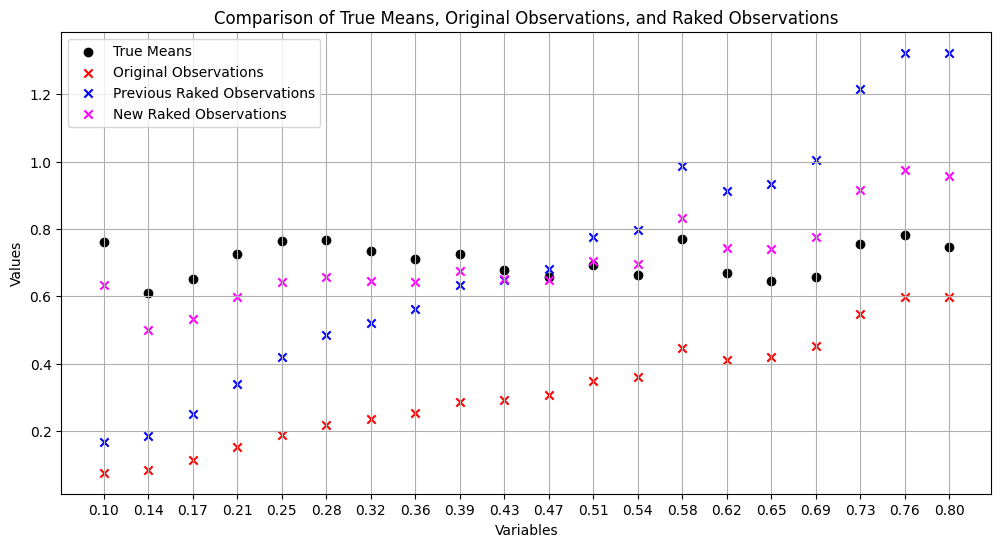

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.special import expit, logit

# Number of variables
n = 20

# Generating means uniformly between 4 and 6
means = np.random.uniform(0.6, 0.8, n)

# Generating multipliers between 0.2 and 0.9
multipliers = np.linspace(0.1, 0.8, n)

# Generating one set of observations as means multiplied by the multipliers
observations = means * multipliers

# Raking to the true sum of means (no randomness)
sum_means = np.sum(means)
raked_observations = observations * (sum_means / np.sum(observations))

# Function to find the root (lambda) for the equation T = sum(p_i * exp(-lambda/w_i))
def equation_to_solve(lmbda, p, w, T):
    return np.sum(p * np.exp(-lmbda / w)) - T

# Calculate weights w_i = 1/multiplier
weights = (0.1+multipliers)

# Solve for lambda
solution = root(equation_to_solve, x0=[0.1], args=(observations, weights, sum_means))

# Extracting the value of lambda
lambda_value = solution.x[0]

# Calculating the 'new' raked observations
new_raked_observations = observations * np.exp(-lambda_value / weights)

# Plotting the true means, original observations, and raked observations
plt.figure(figsize=(12, 6))

# True means in black
plt.scatter(np.arange(n), means, color='black', label='True Means')

# Original observations in red
plt.scatter(np.arange(n), observations, color='red', label='Original Observations', marker='x')

# Previous raked observations in blue
plt.scatter(np.arange(n), raked_observations, color='blue', label='Previous Raked Observations', marker='x')

# New raked observations in magenta
plt.scatter(np.arange(n), new_raked_observations, color='magenta', label='New Raked Observations', marker='x')

plt.title('Comparison of True Means, Original Observations, and Raked Observations')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(np.arange(n), labels=[f"{multiplier:.2f}" for multiplier in multipliers])
plt.legend()
plt.grid(True)
plt.show()

In [29]:
np.sum(observations * np.exp(-lambda_value / weights)) - sum_means

-1.0658141036401503e-14